Rede Neural

In [16]:
import pandas as pd
import numpy as np
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, root_mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("DistanciaEMediasPevs.csv", delimiter=",")

X = data.drop("MediaRendimento", axis=1)
X = X.drop("PEV", axis=1)
y = data.MediaRendimento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
hidden_layers = (200,100,50,25)
mlp_model = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.0003,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=25
)

mlp_model.fit(X_train,y_train)

y_Predito = mlp_model.predict(X_test)

In [2]:
def metricas(y_test, y_Predito):
    mae = mean_absolute_error(y_test, y_Predito)
    mqe = mean_squared_error(y_test, y_Predito)
    rmqe = root_mean_squared_error(y_test, y_Predito)
    rmqle = root_mean_squared_log_error(y_test, y_Predito)
    r2 = r2_score(y_test, y_Predito)

    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mqe}")
    print(f"Root Mean Squared Error: {rmqe}")
    print(f"Root Mean Squared Log Error: {rmqle}")
    print(f"R Squared: {r2}")

In [ ]:
plt.scatter(y_test, y_Predito)
plt.show()

Meu modelo

Calcula a distância para todos os outros registros do conjunto

In [3]:
from myModel import myModel

In [4]:
df = pd.read_csv("localERendimento.csv", delimiter=",", index_col="PEV")

X = df.drop("MediaRendimento", axis=1)
y = df.MediaRendimento

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#X_train = geraTabelaComDistancias(X_train)



X_train = X_train.reset_index(drop=True)
#y_train

Cria a tabela com as distancias 

In [5]:
import criadorTabelaDistancia

In [6]:
def tabelaDistancia(tabela):
    ctd = criadorTabelaDistancia.criadorTabelaDistancia(X)

    distcols = ["distanciaPev" + str(i) for i in X.index]

    newDF = pd.DataFrame(columns=["latitude","longitude"] +distcols)

    for i,row in tabela.iterrows():
        distancias = ctd.calculaDistancias(row["latitude"],row["longitude"])
        cols = [row["latitude"], row["longitude"]] + distancias.tolist()
        newDF.loc[len(newDF)] = cols
        
    return newDF
    

In [7]:
X_train = tabelaDistancia(X_train)
X_test = tabelaDistancia(X_test)

Minimiza função f(x) do meu modelo

In [8]:
from scipy.optimize import minimize

In [ ]:
#print(newDF)
X_train

In [ ]:
y_train

In [ ]:
X_test

In [9]:
model = myModel()

x0 = [2,3,4,5,6]

res = minimize(lambda params: model.calculaErro(params, X_train, y_train), x0, method="trust-constr")


print(res)
print("Melhores parâmetros:", res.x)
print("Erro mínimo:", res.fun)


          message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: 2984258.4795020213
                x: [ 3.606e-02 -3.437e+00  3.872e+01  2.179e+03  3.794e+02]
              nit: 365
             nfev: 2184
             njev: 364
             nhev: 0
         cg_niter: 1520
     cg_stop_cond: 2
             grad: [ 1.884e+03  3.254e+01  4.882e-01  6.619e-01 -3.195e+00]
  lagrangian_grad: [ 1.884e+03  3.254e+01  4.882e-01  6.619e-01 -3.195e+00]
           constr: []
              jac: []
      constr_nfev: []
      constr_njev: []
      constr_nhev: []
                v: []
           method: equality_constrained_sqp
       optimality: 1883.59375
 constr_violation: 0
   execution_time: 553.7595498561859
        tr_radius: 2.637612703505555e-09
   constr_penalty: 1.0
            niter: 365
Melhores parâmetros: [ 3.60554098e-02 -3.43735249e+00  3.87238203e+01  2.17871044e+03
  3.79382009e+02]
Erro mínimo: 2984258.4795020213


In [12]:
y_pred = model.preve(res.x,X_test,y_train)

In [13]:
#X_test
#y_test

metricas(y_test,y_pred)

Mean Absolute Error: 99.41633701250632
Mean Squared Error: 15205.641391253215
Root Mean Squared Error: 123.31115679959059
Root Mean Squared Log Error: 0.4113829641799705
R Squared: 0.07951125019561711


Plota Y(Media) e X(Distancia do PEV)

In [32]:
x_distancias = tabelaDistancia(X)

x_distancias = x_distancias.drop("latitude", axis=1)
x_distancias = x_distancias.drop("longitude", axis=1)


In [40]:
def diferenca_rendimento(referencia, lista_target):
    lista_diferencas = np.zeros(len(lista_target))
    for i in range(0,len(lista_target)):
        lista_diferencas[i] = abs(referencia - lista_target[i])/referencia
        
    return lista_diferencas

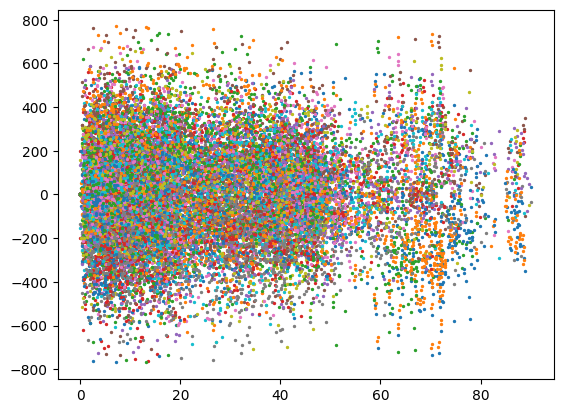

In [37]:

for i,row in x_distancias.iterrows():
    y_diff = diferenca_rendimento(y.iloc[i], y)
    plt.scatter(row,y_diff, s=2)
    
plt.show()

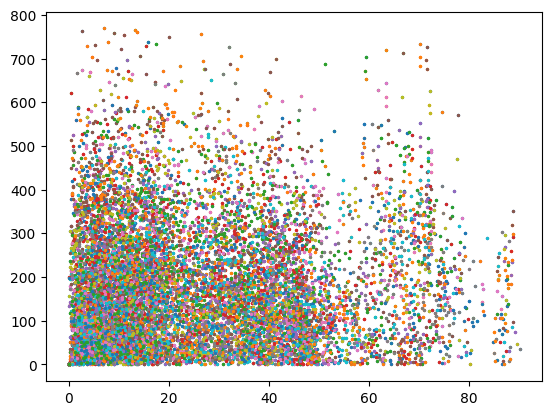

In [39]:
for i,row in x_distancias.iterrows():
    y_diff = diferenca_rendimento(y.iloc[i], y)
    plt.scatter(row,y_diff, s=2)
    
plt.show()

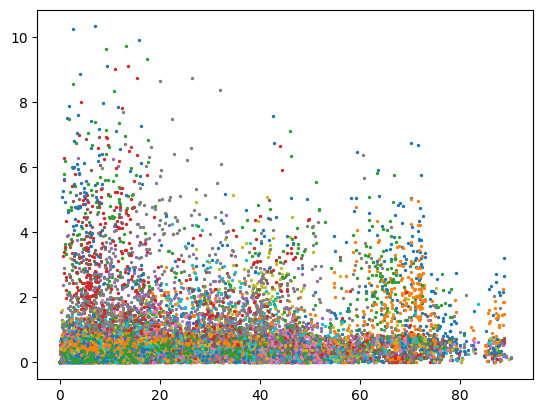

In [41]:
for i,row in x_distancias.iterrows():
    y_diff = diferenca_rendimento(y.iloc[i], y)
    plt.scatter(row,y_diff, s=2)
    
plt.show()